(4000, 2)
2229
2180
2375
6.172971774789471e-06
2453
2455
2341
[-7.15328063e-08 -6.87620068e-08 -7.54119255e-08 ... -1.29409031e-08
 -1.29409031e-08 -1.29409031e-08]
time    2229.000000
mv        -0.097979
Name: 2229, dtype: float64
time    2375.000000
mv        -0.073885
Name: 2375, dtype: float64
time    2407.000000
mv        -0.090448
Name: 2407, dtype: float64
time    2453.000000
mv        -0.108542
Name: 2453, dtype: float64
time    2180.000000
mv        -0.102417
Name: 2180, dtype: float64
time    2341.000000
mv        -0.051792
Name: 2341, dtype: float64


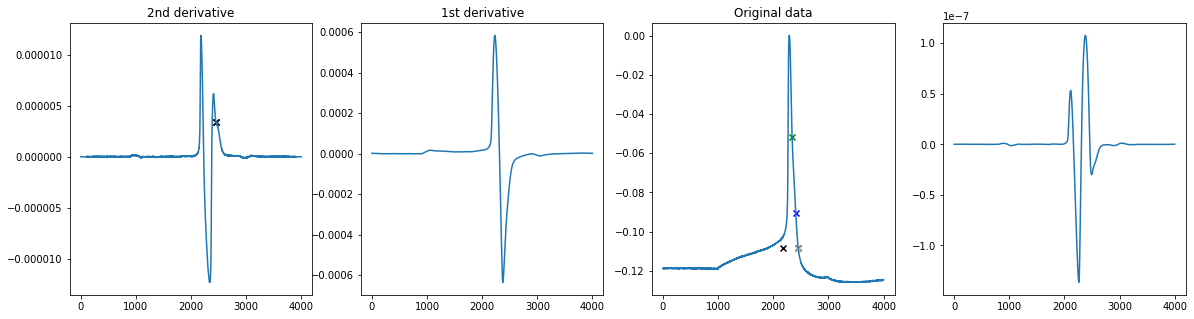

In [24]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.signal import argrelextrema


data = pd.read_csv("trial.csv")
data.columns = ["time","mv"]
print(data.shape)

# differentiate 
mv_diff = savgol_filter(data["mv"], window_length = 201, polyorder = 2, deriv = 1)
#second_diff = savgol_filter(data["mv"], window_length = 201, polyorder = 2, deriv = 2)

#mv_diff = np.diff(data["mv"])
second_diff = np.diff(mv_diff)
third_diff = savgol_filter(second_diff, window_length = 201, polyorder = 2, deriv = 1)

#determine the maximum from the first deriviative
peak_first = np.max(mv_diff)
time_peak_first = np.where(mv_diff == peak_first)
print(time_peak_first[0][0])

#determine the maximum form the second deriviative
peak = np.max(second_diff)
time_peak = np.where(second_diff == peak)
print(time_peak[0][0])

#determine the minimum form the first derivative
minimum_first = np.min(mv_diff)
time_min_first = np.where(mv_diff == minimum_first)
print(time_min_first[0][0])

#get peak from minimum 
peak_from_minimum = np.max(second_diff[time_min_first[0][0]:])
time_min_peak = np.where(second_diff == peak_from_minimum)
print(peak_from_minimum)

#get the max from peak from minimum 
min_peak_array = second_diff[time_min_peak[0][0]+1:]
peak_min_to_max = [min_peak_array[i] for i in range(len(min_peak_array)) if i != 0 and min_peak_array[i] > min_peak_array[i-1]]
time_min_to_max = np.where(second_diff == peak_min_to_max[0])
print(time_min_to_max[0][0])


#get the local maxima in the second derivative
local_max_array = second_diff[time_min_to_max[0][0]:]
peak_local_max = [local_max_array[i] for i in range(len(local_max_array)) if i != 0 and local_max_array[i] < local_max_array[i-1]]
time_to_local_max = np.where(second_diff == peak_local_max[0])
print(time_to_local_max[0][0])

#determine the minimum form the second derivative
minimum = np.min(second_diff)
time_min = np.where(second_diff == minimum)
print(time_min[0][0])

second_trial = np.flip(second_diff[:3000])
print(second_trial)
#point_trial = np.where()


##################################################################
# determine the point location in the orignal frame
data_peak_first = data.iloc[time_peak_first[0][0]]
print(data_peak_first)

# determine the point location in the orignial frame
data_min_first = data.iloc[time_min_first[0][0]]
print(data_min_first)

#determine the point localization of the repolariation 
data_min_to_peak = data.iloc[time_min_peak[0][0]]
print(data_min_to_peak)

#determine the point localization of the repolariation 
data_min_max_peak = data.iloc[time_min_to_max[0][0]]
print(data_min_max_peak)

# determine the point location in the orignal frame
data_peak = data.iloc[time_peak[0][0]]
print(data_peak)

# determine the point location in the orignial frame
data_min = data.iloc[time_min[0][0]]
print(data_min)

#local minimium 
data_local_min = data.iloc[time_min_to_max]
data_local_max = data.iloc[time_to_local_max]

# adjust for the voltage
#plt.plot(mv_diff)
fig,ax = plt.subplots(ncols = 4, nrows =1, figsize = (20,5))
ax[0].plot(second_diff)
ax[0].set_title("2nd derivative")
ax[0].scatter(x = time_min_to_max[0][0], y = peak_min_to_max[0], color = "black", marker = "x")
ax[0].scatter(x = time_to_local_max[0][0], y = peak_local_max[0], color = "black", marker = "x")
ax[1].plot(mv_diff)
ax[1].set_title("1st derivative")
ax[2].plot(data["mv"])
ax[2].scatter(x = data_peak["time"], y = data_local_min["mv"], color = "black", marker = "x")
ax[2].scatter(x = data_min["time"], y = data_min["mv"], color = "green", marker = "x")
ax[2].scatter(x = data_min_to_peak["time"], y = data_min_to_peak["mv"], color = "blue", marker = "x")
ax[2].scatter(x = data_min_max_peak["time"], y = data_min_max_peak["mv"], color = "grey", marker = "x")
ax[2].scatter(x = data_local_min["time"], y = data_local_min["mv"], color = "red", marker = "x")
ax[2].scatter(x = data_local_max["time"], y = data_local_max["mv"], color = "lightgreen", marker = "x")
ax[2].set_title("Original data")
ax[3].plot(third_diff)

In [ ]:
class CurrentClamp():
    """Class to perform action potential detection by means of peak detection and 
    further Action potential fitting to get onset, max mV, duration, half-width and rising time"""
    def __init__(self):
        self.number_of_sweeps = None
        self.ap_duration_threshold = None
        self.mv_treshold = None
        self.transformed_time = None
        self.first_derivative = None
        self.second_derivative = None
         
    def get_first_derivative_data(self, data_trace):
        """get the first filtered derivative
        input -> data_trace only data series"""
        self.first_derivative = savgol_filter(data_trace, 
                                              window_length = 101, 
                                              polyorder = 2, 
                                              deriv = 1, 
                                              mode = "wrap")
    
    def get_second_derivative_data(self, data_trace):
        """get the second derivative
        input --> data_trace only data series"""
        self.second_derivative = savgol_filter(data_trace, 
                                               window_length = 101, 
                                               polyorder = 2, 
                                               deriv = 2, 
                                               mode = "wrap")
    
    def get_max_first(self):
        """get the peak value from the first derivative 
        and get the spot on the non derivative data"""
        max_first_deriv = np.max(self.first_derivative)
        time_peak_first = np.where(self.first_derivative == max_first_deriv)
        data_peak_first = data.iloc[time_peak_first[0][0]]
        return (max_first_deriv,time_peak_first,data_peak_first)
    
    
    def get_min_first(self):
        #determine the minimum form the first derivative
        minimum_first = np.min(self.first_derivative)
        time_min_first = np.where(mv_diff == minimum_first)
        data_min_first = data.iloc[time_min_first[0][0]]
        return (minimum_first, time_min_first, data_min_first)
    
    
    
    
    

        
        
        
    
        
        
        

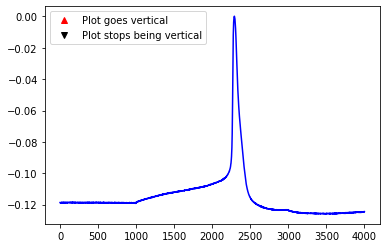